# Climate Change Sentiment Analysis

The purpose of this analysis is to delve into public sentiments, extracting valuable insights and uncovering diverse perspectives. By understanding the emotions expressed within a specific context, we can identify meaningful patterns and trends. These insights inform decision-making and enhance communication strategies.

![Twitter Hexagon](https://semhexagon.com/en/wp-content/uploads/2022/08/twiiterHxagon.png)

---
Photo by <a href="semhaxagon"> SemHaxagon</a>

---
Stay ahead by uncovering real-time Twitter trends and sentiments for informed decision-making!

## Predict overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, our task is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on EDSA's novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

The data and evaluation metric we will be using (F1 score) are from the [EA - Twitter Sentiment Classification competition](https://www.kaggle.com/competitions/edsa-sentiment-classification/overview).

## What we will end up with:

Since we already have a dataset, we will approach the problem with the following machine learning modelling framework.

| [<img src="ml101-6-step-ml-framework.png" style="max-width:100%; height:auto;"/>](https://whimsical.com/6-step-field-guide-to-machine-learning-projects-flowcharts-9g65jgoRYTxMXxDosndYTB) | 
|:--:| 

To work through these topics, we will use the following Python libraries:

- **[Numpy](https://numpy.org/)**: NumPy is a fundamental library for numerical computing in Python. It provides efficient array manipulation and mathematical operations, making it essential for many scientific computations.

- **[Pandas](https://pandas.pydata.org/)**: Pandas is a powerful library for data manipulation and analysis. It offers data structures like DataFrames that allow for easy handling, cleaning, and exploration of structured data.

- **[Matplotlib](https://matplotlib.org/)**: Matplotlib is a plotting library that enables the creation of various types of visualisations, such as line plots, scatter plots, histograms, and more. It provides flexibility and customisation options for creating publication-quality figures.

- **[Seaborn](https://seaborn.pydata.org/)**: Seaborn is a data visualisation library built on top of Matplotlib. It provides a simplified interface for creating attractive statistical graphics, including heatmaps, violin plots, and joint plots.

- **[Scikit-learn](https://scikit-learn.org/stable/)**: Scikit-learn is a machine learning library that offers a wide range of algorithms for classification, regression, clustering, and dimensionality reduction. It provides an easy-to-use API for model training, evaluation, and prediction.

Other libraries will be used, but only in small parts of the notebook. So they are not included in this list.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Problem Definition</a>

<a href=#two>2. Data</a>

<a href=#three>3. Evaluation</a>

<a href=#four>4. Features</a>

<a href=#five>5. Modelling</a>

<a href=#six>6. Experiments</a>

<a id="one"></a>
## 1. Problem Definition
<a href=#cont>Back to Table of Contents</a>

Welcome to the digital age, where advancements in social media have given rise to the significance of sentiment analysis. Powered by artificial intelligence and natural language processing, sentiment analysis allows us to delve into the realm of public perspectives and emotional insights. By harnessing the vast ocean of social media data, particularly platforms like Twitter, we can uncover the collective sentiment surrounding various topics, products, events, or trends. This understanding enables businesses to adapt their strategies, refine their offerings, and align their messaging with the prevailing sentiments, leading to data-driven decisions, enhanced brand reputation management, and improved customer satisfaction in the dynamic digital landscape.


### Problem Statement

Despite the vast potential of leveraging Twitter data for marketing purposes, marketers face challenges in effectively interpreting and utilizing sentiment analysis. While sentiment analysis provides insights into public sentiment, marketers often express concerns about the accuracy and contextual understanding of sentiment analysis algorithms. The nuances of human expression, sarcasm, or cultural variations in language can be challenging to capture accurately. Marketers also need to consider the limitations of automated sentiment analysis, as it may not fully capture the complexities of consumer emotions. Addressing these concerns and improving the accuracy and contextual understanding of sentiment analysis algorithms is crucial for marketers to confidently leverage Twitter data for actionable insights and informed decision-making in their marketing strategies.


### Investigative Objectives

The key intentions of this research:

- Importing Libraries: Import necessary packages for data processing and analysis.
- Reading Data: Load the dataset for further analysis.
- Data Preprocessing: Prepare the dataset by handling missing values, outliers, and applying necessary transformations.
- Tokenization: Break the text data into individual tokens for analysis.
- Comet Analysis: Utilize the Comet algorithm to uncover patterns and correlations in the data.
- Exploratory Data Analysis (EDA): Analyze the dataset to uncover insights and trends. 
- Develop innovative features to enhance model performance
- Construct a classification model to determine sentiment beliefs based on tweet data
- Assess the accuracy of the top-performing machine learning model

<a id="two"></a>
## 2. Data
<a href=#cont>Back to Table of Contents</a>

### Where is this data from?

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

### Class Description

- 2 (News): the tweet links to factual news about climate change.

- 1 (Pro): the tweet supports the belief of man-made climate change.

- 0 (Neutral): the tweet neither supports nor refutes the belief of man-made climate change.

- -1 (Anti): the tweet does not believe in man-made climate change Variable definitions.

### Features

- **sentiment**: Which class a tweet belongs in (refer to Class Description above).

- **message**: Tweet body.

- **tweetid**: Twitter unique id.

### The files provided

- **train.csv** - This data is used to train our model.

- **test.csv** - This data is used to test our model.

<a id="three"></a>
## 3. Evaluation
<a href=#cont>Back to Table of Contents</a>

The evaluation metric for this competition is [Mean F1-Score](https://towardsdatascience.com/the-f1-score-bec2bbc38aa6). The F1 score, commonly used in information retrieval, measures performance using using the statistics precision and recall.

Precision is the ratio of true positives to all predicted positives. Recall is the ratio of true positives to all actual positives.
The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

Both precision and recall have values between 0 and 1, where 1 represents perfect precision or recall. Since the F1 score is a combination of these two metrics, it will also have a value between 0 and 1. A value of 1 indicates a perfect balance between precision and recall, while a value close to 0 indicates poor performance. Therefore, the goal will be to get this value as close to 1 as possible.

<a id="four"></a>
## 4. Features
<a href=#cont>Back to Table of Contents</a>

Features are different parts of the data. During this step, we want to start finding out what we can about the data.

First, we will import the dataset and start exploring. Since we know the evaluation metric we are trying to maximise, our first goal will be building a baseline model and seeing how it stacks up against the competition.

### Importing packages and the data

First, we start a Comet experiment to log the parameters of our models online.

In [84]:
from comet_ml import Experiment

Instead of making our API key public, we will read it from a config file we created. For more information, follow this link: https://blog.netwrix.com/2022/11/14/how-to-hide-api-keys-github/


In [85]:
# From https://blog.netwrix.com/2022/11/14/how-to-hide-api-keys-github/
import config
# Create an experiment with your api key
experiment = Experiment(
    api_key = config.api_key,
    project_name = config.project_name,
    workspace = config.workspace,
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/khulu2/classification-predict/0f673f271e594d9eb82582e3b6fd3cf1



### Import other libraries

In [86]:
import pandas as pd
import numpy as np
import re
from tqdm.auto import tqdm
import itertools

# imports for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# imports for pre-processing
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import *
import string
import nltk

#
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scikitplot.metrics import plot_roc, plot_confusion_matrix # pip install scikit-plot

import parfit.parfit as pf
from sklearn.model_selection import ParameterGrid


### Read in the data

In [87]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test_with_no_labels.csv")

# Create copies for modeling
train = df_train.copy()
test = df_test.copy()

In [88]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [89]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [90]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


Checking if there are missing values...


In [91]:
df_train.isna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sentiment  15819 non-null  bool 
 1   message    15819 non-null  bool 
 2   tweetid    15819 non-null  bool 
dtypes: bool(3)
memory usage: 46.5 KB


In [92]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no missing values in the train dataset.

### Pre-processing

First, we extract mentions and hashtags

In [93]:
def get_hashtags_and_mentions(df):
    df["hashtags"] = df["message"].str.lower().str.findall(r'#.*?(?=\s|$)')
    hashtags = df["hashtags"]
    
    df["mentions"] = df["message"].str.lower().str.findall(r'@\w*')
    mentions = df["mentions"]
    
    df["url"] = df["message"].str.lower().str.findall(r'http\S+|www.\S+')
    urls = df["url"]

    df["hashtags"] = [np.nan if len(x) == 0 else x for x in hashtags]
    df["mentions"] = [np.nan if len(x) == 0 else x for x in mentions]
    df["url"] = [np.nan if len(x) == 0 else x for x in urls]
    
    return df

In [94]:
get_hashtags_and_mentions(df_train).head()

,sentiment,message,tweetid,hashtags,mentions,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,RT @RawStory: Researchers say we have three ye...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight],[@soynoviodetodas],NaN


We apply each step we applied to the training dataset to the test dataset too.

In [95]:
get_hashtags_and_mentions(df_test).head()

,message,tweetid,hashtags,mentions,url
0,Europe will now be looking to China to make su...,169760,NaN,NaN,[https://t.co/o7t8rcgwdq]
1,Combine this with the polling of staffers re c...,35326,NaN,NaN,[https://t.co/ifrm7eexpj]
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]",[@zeroco2_],[https://t.co/yaedqcv9ki]
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263,NaN,"[@karoli, @morgfair, @osborneink, @dailykos]",NaN
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928,NaN,[@fakewillmoore],NaN


Second, we remove Twitter handles (e.g., @RawStory), hashtags, mentions and urls. These do not provide any important information related to our objective

In [96]:
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+', '', text)

def remove_twitter_handles(text):
    return re.sub(r'@\w*', '', text)

def remove_hashtags(text):
    return re.sub(r'#.*?(?=\s|$)', '', text)

def remove_rt(text):
    return text.replace('RT', '')

df_train["message"] = df_train["message"].apply(remove_urls)
df_train["message"] = df_train["message"].apply(remove_twitter_handles)
df_train["message"] = df_train["message"].apply(remove_hashtags)
df_train["message"] = df_train["message"].apply(remove_rt)

df_train.head()

,sentiment,message,tweetid,hashtags,mentions,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN


In [97]:
df_test["message"] = df_test["message"].apply(remove_urls)
df_test["message"] = df_test["message"].apply(remove_twitter_handles)
df_test["message"] = df_test["message"].apply(remove_hashtags)
df_test["message"] = df_test["message"].apply(remove_rt)

df_test.head()

,message,tweetid,hashtags,mentions,url
0,Europe will now be looking to China to make su...,169760,NaN,NaN,[https://t.co/o7t8rcgwdq]
1,Combine this with the polling of staffers re c...,35326,NaN,NaN,[https://t.co/ifrm7eexpj]
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]",[@zeroco2_],[https://t.co/yaedqcv9ki]
3,\r\nPutin got to you too Jill ! \r\nTrump ...,476263,NaN,"[@karoli, @morgfair, @osborneink, @dailykos]",NaN
4,: 'Female orgasms cause global warming!'\r\n-...,872928,NaN,[@fakewillmoore],NaN


### Tokenization

Tokenization is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

During tokenization, we will also remove the following:
- Punctuation, special characters and numbers: With regards to punctuation, special characters and numbers, many, if not all, do not change or determine the overall sentiment of a tweet. Thus, it is important to remove these from the tweets.

- Short words (i.e., single letters): A vast majoity of short words which are only one letter long do not add much information surrounding the sentiment.

In [98]:
def tokenize_tweets(df):
    # tokenizing the tweets
    # Read more: https://www.kaggle.com/general/288653
    cleaned_tweets = df["message"].apply(TweetTokenizer().tokenize)

    # remove punctuation
    cleaned_tweets = cleaned_tweets.apply(lambda x : [token for token in x if token not in string.punctuation])

    # removing digits from the tweets
    cleaned_tweets = cleaned_tweets.apply(lambda x: [token for token in x if token not in list(string.digits)])

    # removing all one character tokens
    cleaned_tweets = cleaned_tweets.apply(lambda x: [token for token in x if len(token) > 1])
    
    df["tokenized_tweets"] = cleaned_tweets
    
    return df["tokenized_tweets"]

In [99]:
tokenize_tweets(df_train).head()

0    [PolySciMajor, EPA, chief, doesn't, think, car...
1    [It's, not, like, we, lack, evidence, of, anth...
2    [Researchers, say, we, have, three, years, to,...
3    [WIRED, 2016, was, pivotal, year, in, the, war...
4    [It's, 2016, and, racist, sexist, climate, cha...
Name: tokenized_tweets, dtype: object

In [100]:
tokenize_tweets(df_test).head()

0    [Europe, will, now, be, looking, to, China, to...
1    [Combine, this, with, the, polling, of, staffe...
2    [The, scary, unimpeachable, evidence, that, cl...
3    [Putin, got, to, you, too, Jill, Trump, doesn'...
4    [Female, orgasms, cause, global, warming, Sarc...
Name: tokenized_tweets, dtype: object

Stop words are commonly occurring words that are often considered to be insignificant and are typically removed from text during preprocessing. These words include articles (e.g., "a," "an," "the"), prepositions (e.g., "in," "on," "at"), conjunctions (e.g., "and," "but," "or"), and other high-frequency words that do not carry substantial meaning or contribute significantly to the context of the text.

The rationale behind removing stop words is to reduce the dimensionality of the data and eliminate noise that may interfere with certain NLP tasks, such as text classification, information retrieval, and sentiment analysis. By removing these frequently occurring words, we can focus on the more informative and content-rich words that are likely to carry more significance in the analysis.

In [101]:
nltk.download('stopwords')

stop = stopwords.words('english')

# Convert to lower case
df_train["tokenized_tweets"] = df_train["tokenized_tweets"].apply(lambda x: [word.lower() for word in x])

# Remove stopwords
df_train["no_stopwords"] = df_train["tokenized_tweets"].apply(lambda x: [item for item in x if item not in stop])

df_train.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sentiment,message,tweetid,hashtags,mentions,url,tokenized_tweets,no_stopwords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ..."
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,..."
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha..."
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin..."


In [102]:
# do to test what we do to train
df_test["tokenized_tweets"] = df_test["tokenized_tweets"].apply(lambda x: [word.lower() for word in x])

# Remove stopwords
df_test["no_stopwords"] = df_test["tokenized_tweets"].apply(lambda x: [item for item in x if item not in stop])

df_test.head()

,message,tweetid,hashtags,mentions,url,tokenized_tweets,no_stopwords
0,Europe will now be looking to China to make su...,169760,NaN,NaN,[https://t.co/o7t8rcgwdq],"[europe, will, now, be, looking, to, china, to...","[europe, looking, china, make, sure, alone, fi..."
1,Combine this with the polling of staffers re c...,35326,NaN,NaN,[https://t.co/ifrm7eexpj],"[combine, this, with, the, polling, of, staffe...","[combine, polling, staffers, climate, change, ..."
2,"The scary, unimpeachable evidence that climate...",224985,"[#itstimetochange, #climatechange]",[@zeroco2_],[https://t.co/yaedqcv9ki],"[the, scary, unimpeachable, evidence, that, cl...","[scary, unimpeachable, evidence, climate, chan..."
3,\r\nPutin got to you too Jill ! \r\nTrump ...,476263,NaN,"[@karoli, @morgfair, @osborneink, @dailykos]",NaN,"[putin, got, to, you, too, jill, trump, doesn'...","[putin, got, jill, trump, believe, climate, ch..."
4,: 'Female orgasms cause global warming!'\r\n-...,872928,NaN,[@fakewillmoore],NaN,"[female, orgasms, cause, global, warming, sarc...","[female, orgasms, cause, global, warming, sarc..."


Create a column for each tweets sentiment

In [103]:
df_train["sentiment_name"] = df_train["sentiment"].map({-1: "Anti", 0: "Neutral", 1: "Pro", 2: "News"})
df_train.head()

,sentiment,message,tweetid,hashtags,mentions,url,tokenized_tweets,no_stopwords,sentiment_name
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,...",News
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro


In [104]:
df_eda = df_train.copy()
df_eda.head()

,sentiment,message,tweetid,hashtags,mentions,url,tokenized_tweets,no_stopwords,sentiment_name
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researchers, say, three, years, act, climate,...",News
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro


### Exploratory data analysis

In [105]:
sns.set()

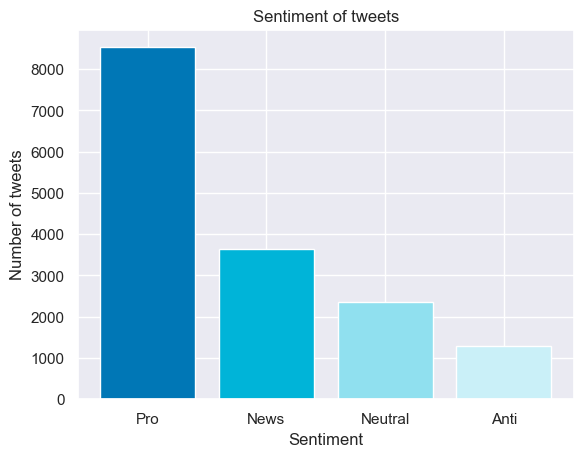

In [106]:
colors = ["#0077b6","#00b4d8","#90e0ef","#caf0f8"]  # Specify colors for each bar

plt.bar(df_eda['sentiment_name'].unique(), df_eda['sentiment_name'].value_counts(), color = colors)

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.title('Sentiment of tweets')

# Display the plot
plt.show()


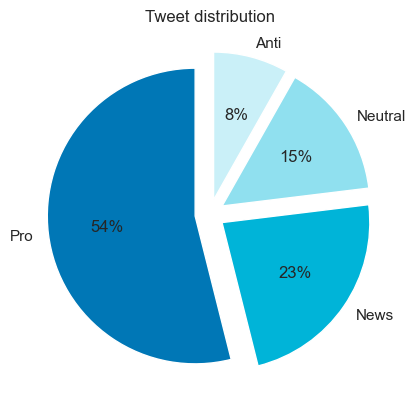

In [107]:
labels = df_eda['sentiment_name'].unique()

plt.pie(df_eda["sentiment_name"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            colors = colors,
            explode=tuple([0.1] * len(labels)))

plt.title('Tweet distribution')

# Display the plot
plt.show()

The previous two plots indicate that our dataset is not balanced. There are more entries belonging to people who have the belief of man-made climate change. Over 50% of the data is comprised of such tweets.

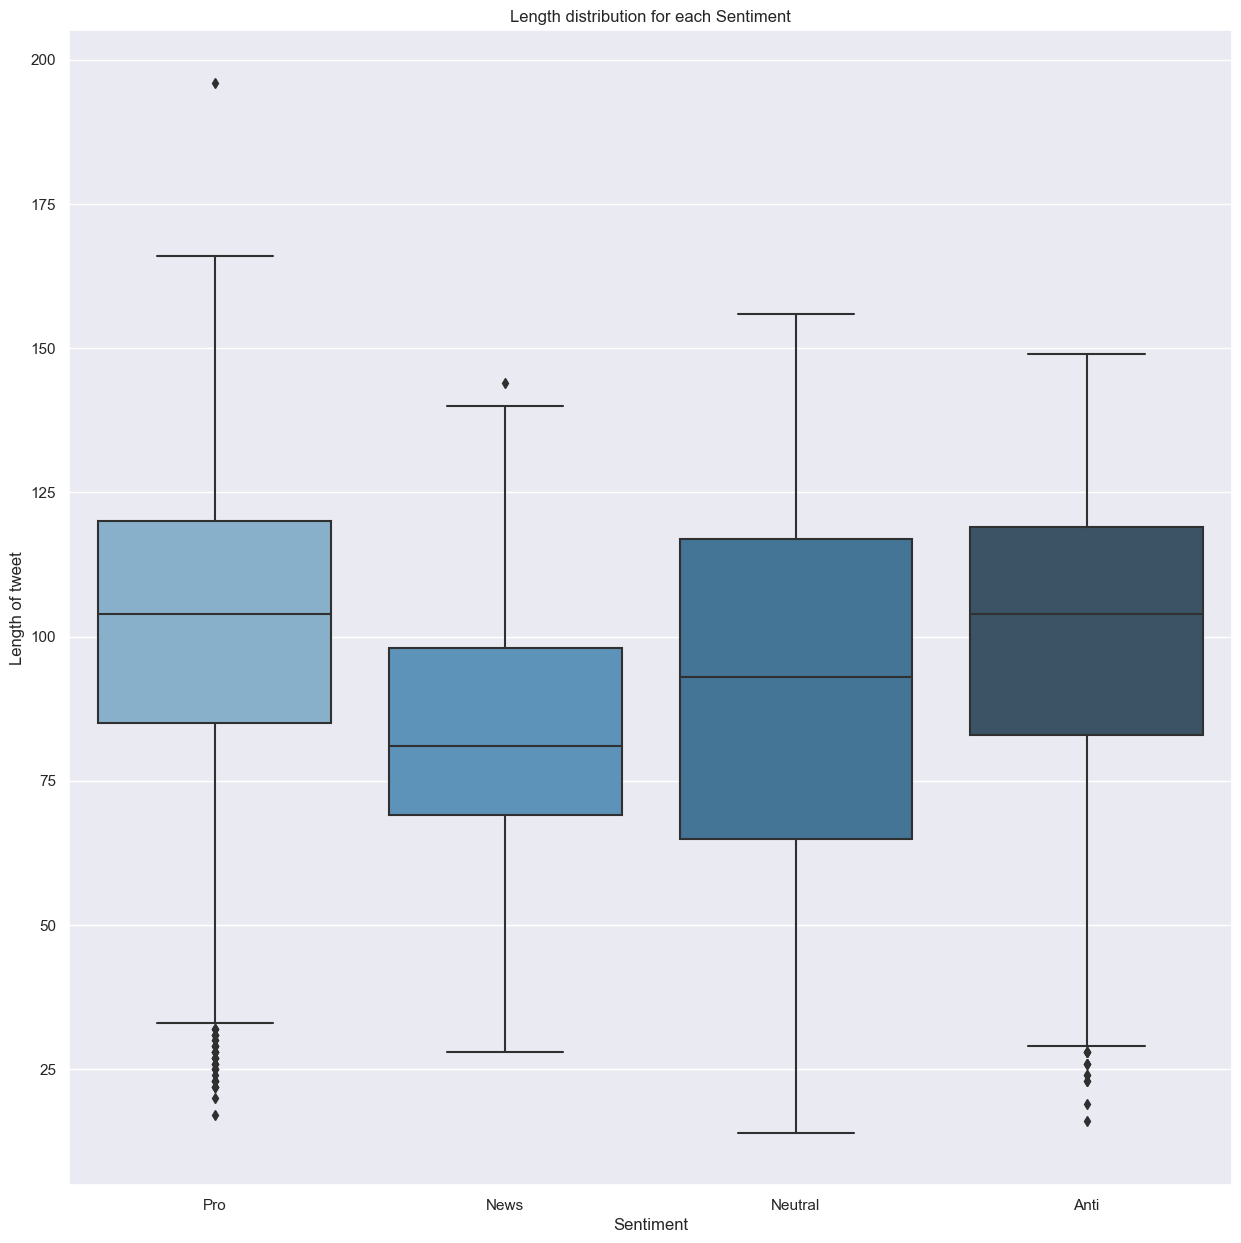

In [108]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment_name", y=df_eda['message'].apply(len), data=df_eda, palette=("Blues_d"))
plt.title("Length distribution for each Sentiment")

# Adding labels 
plt.xlabel('Sentiment')
plt.ylabel('Length of tweet')

plt.show()

The length of the text is determined by the character limit of each tweet. The character limit used to be 140, however in [late 2017](https://www.forbes.com/sites/nicholasreimann/2023/02/08/twitter-boosts-character-limit-to-4000-for-twitter-blue-subscribers/?sh=689ca7825ab8), it was expanded to 280 characters. All sentiment classes have outliers, with the only exception being the `Neutral` class.

In [109]:
# Top 10 hashtags used in each class
top10 = {}

by_sentiment = df_eda.groupby("sentiment_name")
for sentiment, group in tqdm(by_sentiment):
    hashtags = group["hashtags"].apply(lambda tweet: [re.sub(r'\]', '', ht) for ht in re.findall(r'#\w+', str(tweet))])
    hashtags = itertools.chain(*hashtags)
    hashtags = [ht.lower() for ht in hashtags]
    
    frequency = nltk.FreqDist(hashtags)
    
    df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "count": list(frequency.values()),
    })
    top10_htags = df_hashtags.nlargest(10, columns=["count"])
    
    top10[sentiment] = top10_htags.reset_index(drop=True)

display(pd.concat(top10, axis=1).head(n=10))

  0%|          | 0/4 [00:00<?, ?it/s]

Anti                Neutral                     News         
          hashtags count         hashtags count           hashtags count   
0            #maga    14         #climate    19           #climate   135  \
1         #climate    10   #climatechange    15     #climatechange    65   
2           #trump     8           #trump    12       #environment    47   
3   #climatechange     8  #beforetheflood     5              #news    32   
4   #globalwarming     5           #qanda     4             #trump    25   
5        #fakenews     4       #amreading     4           #science    18   
6    #opchemtrails     4           #cop22     4                #p2    14   
7            #tcot     4   #globalwarming     3  #greatbarrierreef    14   
8  #parisagreement     4     #parisaccord     3             #cop22    14   
9           #qanda     3   #climatecounts     3    #parisagreement     9   

                Pro        
           hashtags count  
0          #climate   188  
1   #beforetheflood   148  
2    #climatechange   120  
3  #imvotingbecause    62  
4            #cop22    59  
5   #parisagreement    52  
6     #actonclimate    49  
7            #trump    43  
8                #ã    37  
9    #globalwarming    35

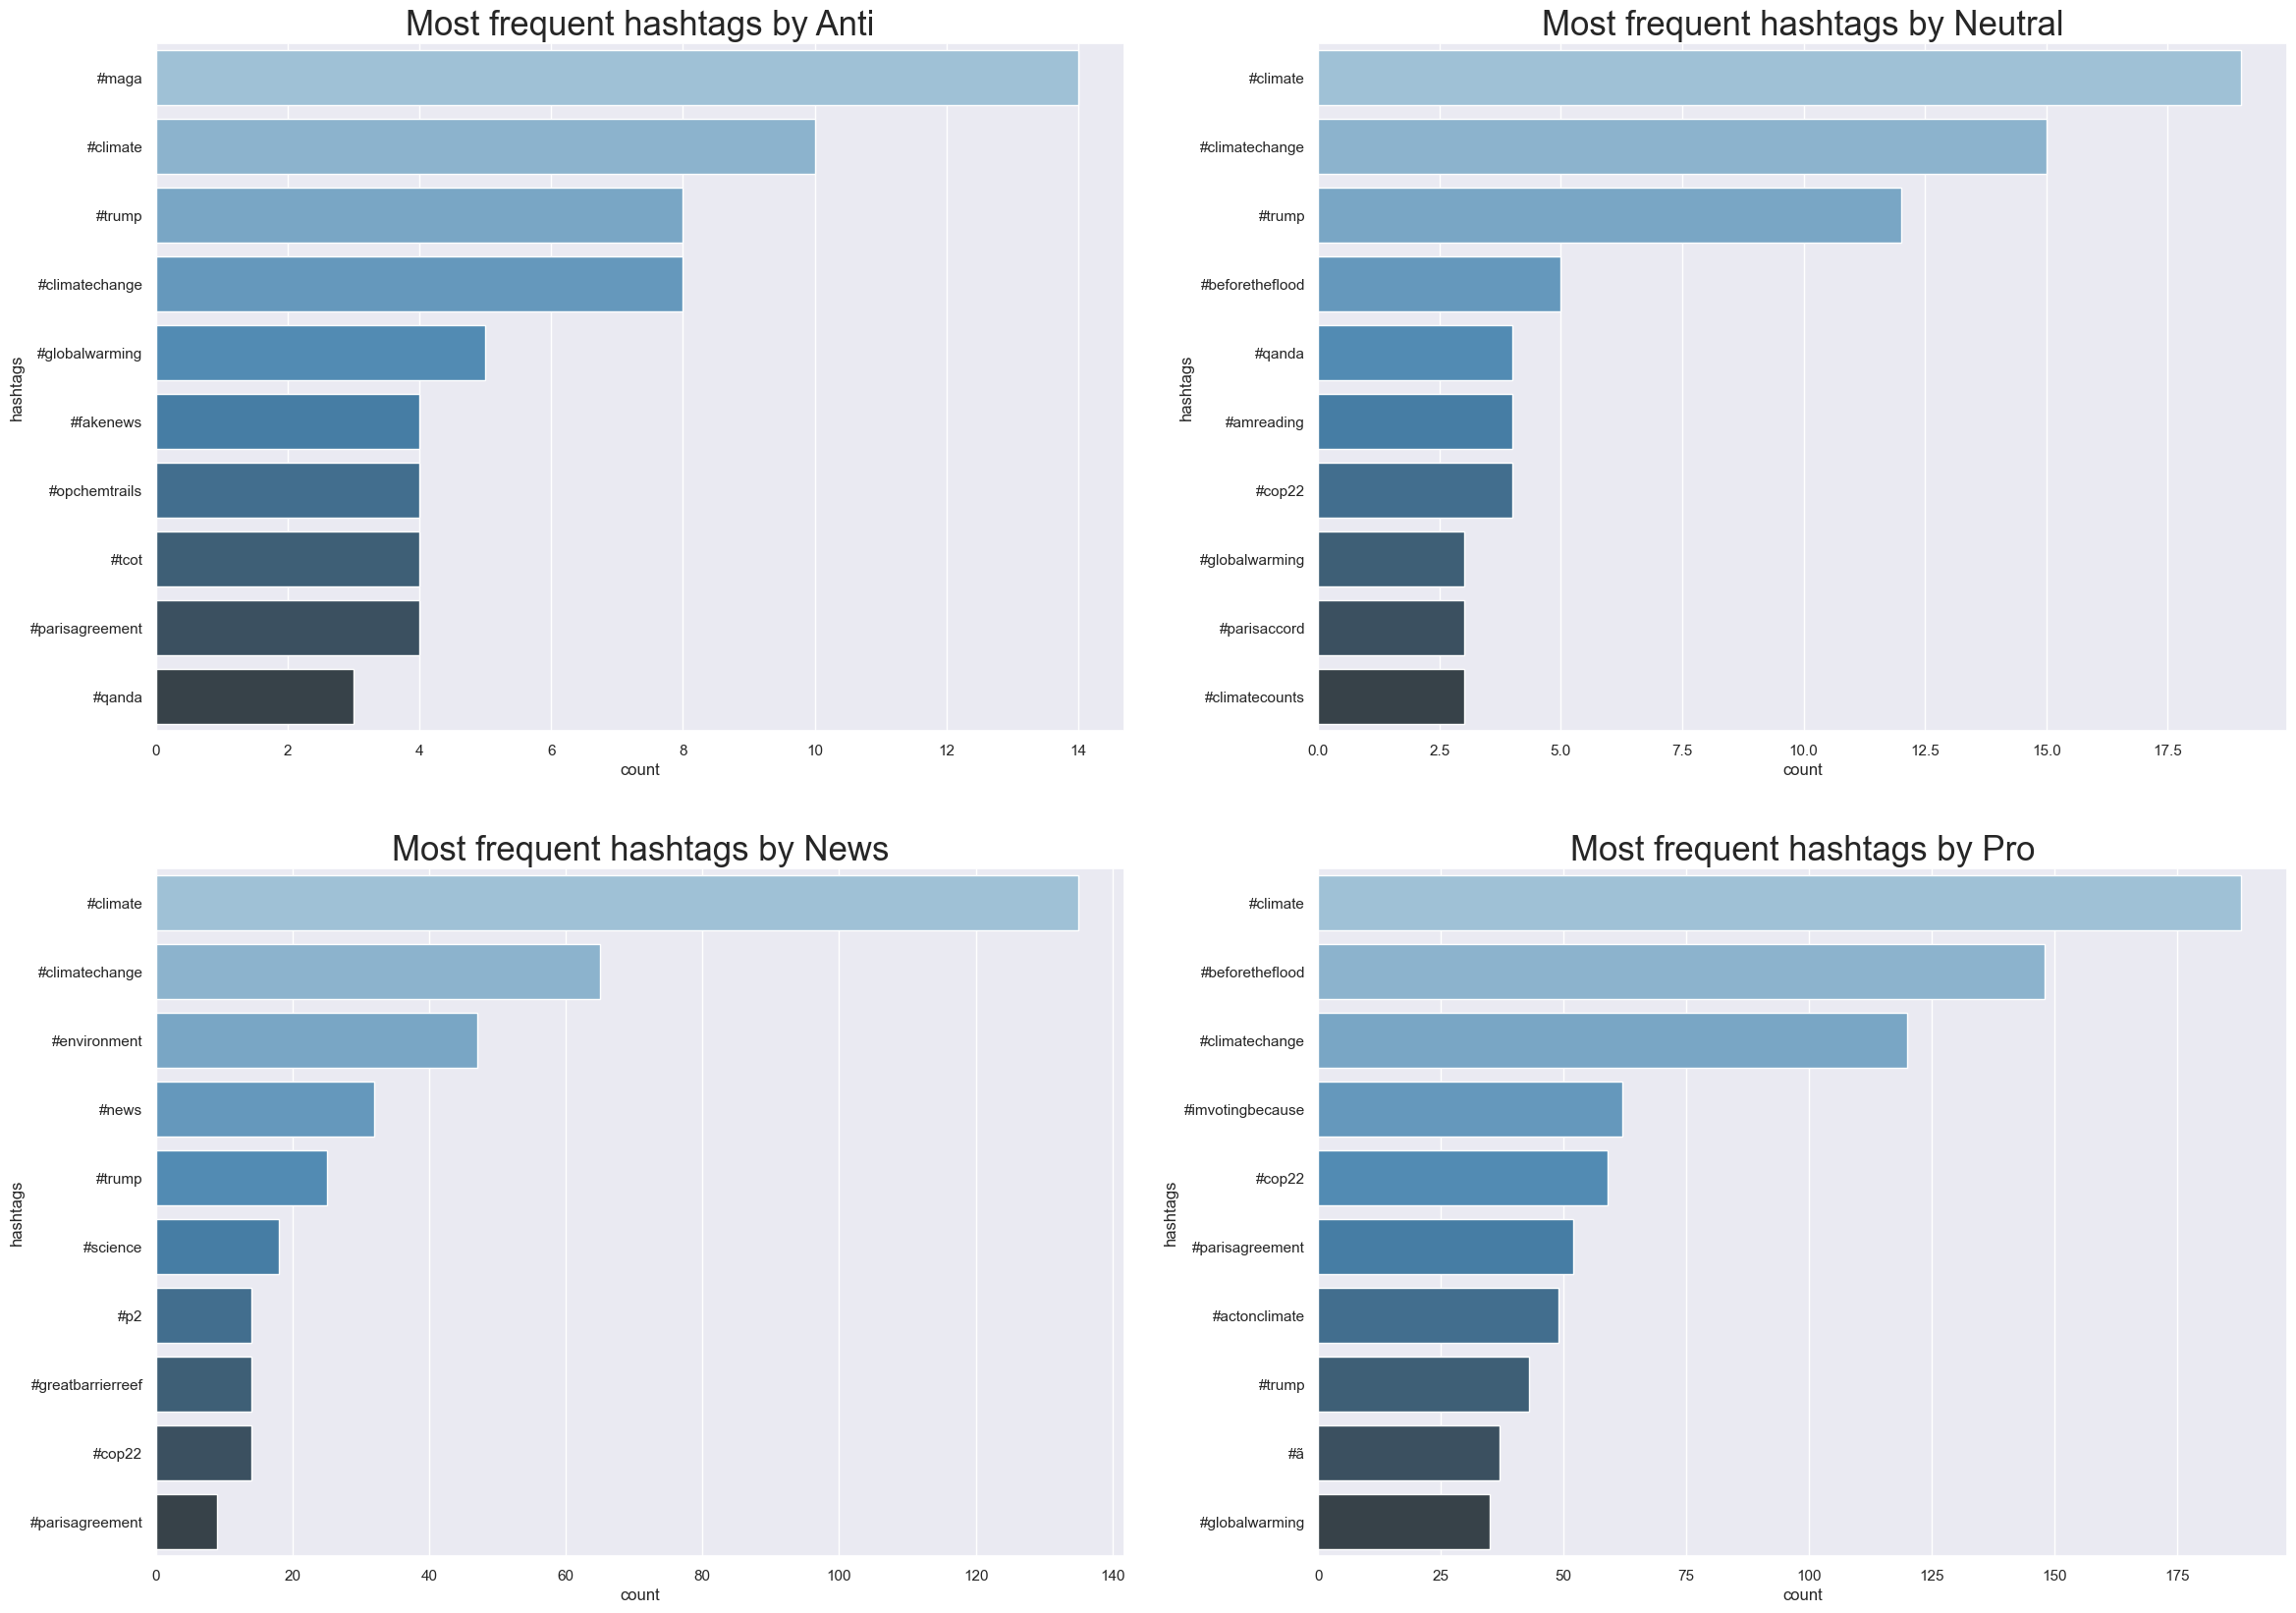

In [110]:
# Visuals of top 10 tweets
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, top in top10.items():
    sns.barplot(data=top, y="hashtags", x="count", palette="Blues_d", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent hashtags by {sentiment}", fontsize=25)
    counter += 1
plt.show()

* `#climate` and `#climatechange` are expected to be the most popular as they are our key identifier in tweets.
* `#BeforeTheFlood` surfaced after a [documentary](https://en.wikipedia.org/wiki/Before_the_Flood_(film)) about environmental degradation that leads to global warming and suggestions on how to reduce it, narrated by Leonardo DiCaprio. This hashtag is most popular in tweets belonging in the `Pro` and `Neutral` categories.
* `#trump` is one of the top hashtags for the Anti class. This could possibly be due to Donald Trump calling climate change a ["hoax"](https://www.motherjones.com/environment/2016/12/trump-climate-timeline/) multiple times.
* The `#cop22` represents the [United Nations Climate Change Conference](https://unfccc.int/event/cop-22) that took place in 2016.

In [111]:
# Creating a column of hastags users
train["users"] = [''.join(re.findall(r'@\w{,}', sentence.lower())) if '@' in sentence else np.nan for sentence in train.message]

In [112]:
# Number of messages per users
users = train[["message", "users"]].groupby("users", as_index = False).count().sort_values(by = "message", ascending = False)
users.head()

,users,message
5876,@stephenschlegel,307
5618,@sensanders,243
5069,@realdonaldtrump,143
736,@berniesanders,121
1430,@cnn,106


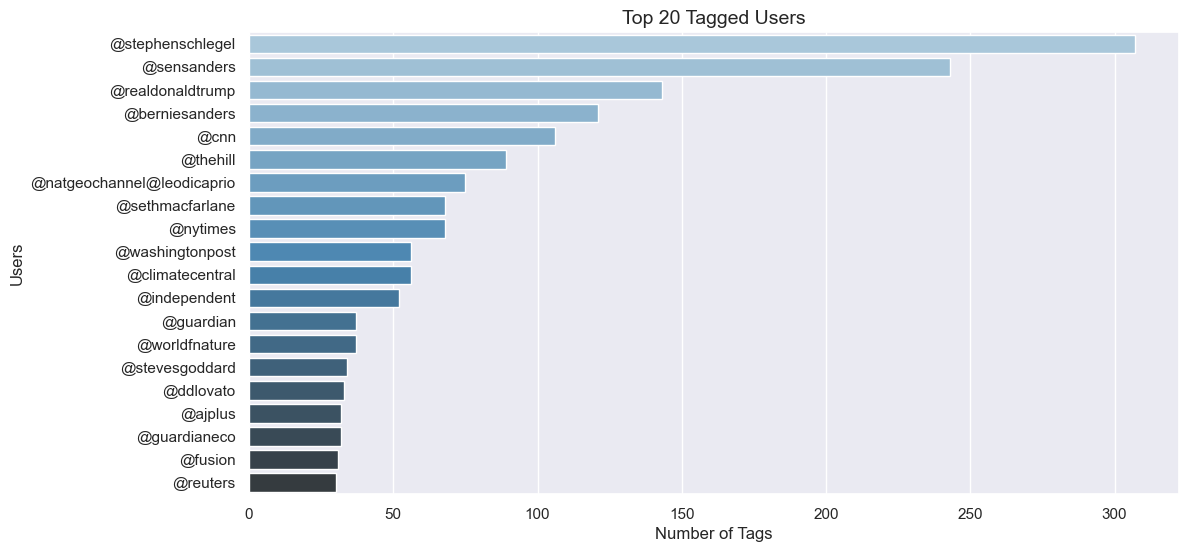

In [113]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data = train, y = "users", order = train.users.value_counts().iloc[:20].index, orient = 'h', palette = "Blues_d")
plt.title("Top 20 Tagged Users", fontsize = 14)
plt.xlabel("Number of Tags")
plt.ylabel("Users")
plt.show()

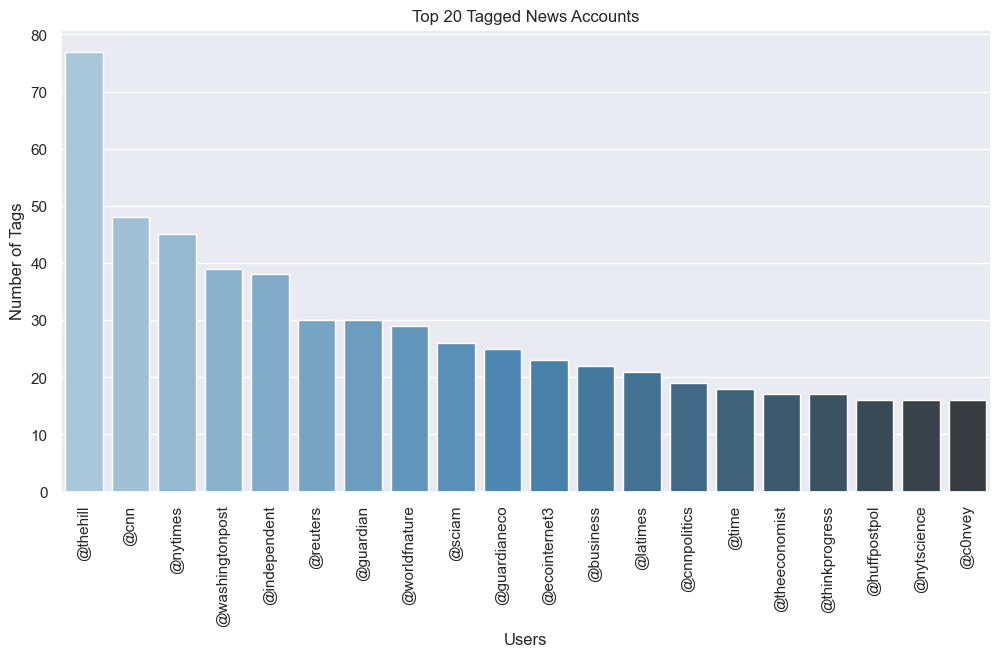

In [114]:
plt.figure(figsize=(12, 6))

sns.countplot(x = "users", data = train[train["sentiment"] == 2], order = train[train["sentiment"] == 2].users.value_counts().iloc[:20].index, palette = "Blues_d") 

plt.xlabel("Users")
plt.ylabel("Number of Tags")
plt.title("Top 20 Tagged News Accounts")
plt.xticks(rotation = 90)
plt.show()

<a id="five"></a>
## 5. Modelling
<a href=#cont>Back to Table of Contents</a>

### Base models

The following classification models will be used:
- Decision Tree Classifier
- LinearSVC (Support Vector Classifier)
- Logistic Regression
- RandomForest Classifier
- Ridge Classiffier
- Support Vector Classifier
- Stochastic Gradient Descent (SGD)

In [115]:
def POS(word):
    """
    This function gets the part of speech.
    Takes the arguments:
        word, string data type.
    Matches word with synonyms
    Tags word and count tags.
    Returns The most common tag, the tag with the highest count, ex: n for Noun, string data type.

    """
    pos_counts = Counter()
    probable_part_of_speech = wordnet.synsets(word)

    # Taging and counting tags
    pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"]) # Noun
    pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"]) # Verb
    pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"]) # Adjective
    pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"]) # Adverb
    # The most common tag, the tag with the highest count, ex: n for Noun
    part_of_speech = pos_counts.most_common(1)[0][0]

    return part_of_speech

In [116]:
lemmatizer = WordNetLemmatizer()
df_train["no_stopwords"] = df_train["no_stopwords"].apply(lambda x: [lemmatizer.lemmatize(token, POS(token)) for token in x])
df_test["no_stopwords"] = df_test["no_stopwords"].apply(lambda x: [lemmatizer.lemmatize(token, POS(token)) for token in x])
df_train.head()

,sentiment,message,tweetid,hashtags,mentions,url,tokenized_tweets,no_stopwords,sentiment_name
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro
2,2,: Researchers say we have three years to act ...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]","[researchers, say, we, have, three, years, to,...","[researcher, say, three, year, act, climate, c...",News
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wire, 2016, pivotal, year, war, climate, change]",Pro
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, deny, ...",Pro


In [117]:
X = df_train["no_stopwords"]
y = df_train["sentiment"]
X_test = df_test["no_stopwords"]

We are going to split the data into 80% train and 20% validation. The primary objective of dividing the dataset into a validation set is to avoid overfitting (which occurs when a model gets extremely good at categorizing samples in the training set but is unable to generalise and make accurate classifications on data it has never seen before).

In [118]:
# Splitting the data into 80% train and 20% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [119]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

A pipeline is a sequential tool that applies a series of transformations and a final estimator. The intermediate steps of the pipeline utilise fit and transform techniques, while the final estimator only requires fit implementation. Pipelines are helpful for transforming training, validation, and test data, as well as training our models.

Since our models can only process numerical data, our initial task is to construct a pipeline that converts text data into numeric form. In this notebook, we will focus on two feature engineering methods, namely TfidfVectorizer and CountVectorizer, to accomplish this conversion. Subsequently, we will train our models using these pipelines.

By constructing pipelines with both techniques, we will evaluate the average accuracy of the TfidfVectorizer and CountVectorizer. Based on the results, we will decide which feature extraction method, either TF-IDF or CountVectorizer, to utilise for the remaining sections of the notebook.

In [120]:
# DecisionTreeClassifier Pipeline
tree_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ('tree', DecisionTreeClassifier()),])

tree_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('tree', DecisionTreeClassifier()),])

# RandomForestClassifier Pipeline
rfc_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ('rfc', RandomForestClassifier())])

rfc_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('rfc', RandomForestClassifier()),])


# LinearSVC Pipeline
Lsvc_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ('scv', LinearSVC()),])

Lsvc_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('svc', LinearSVC()),])

# Logistic Regression Pipeline
logreg_tfidf = Pipeline([("tfidf", TfidfVectorizer()),('logistic', LogisticRegression()),])

logreg_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('logistic', LogisticRegression()),])

# SGD Classifier Pipeline
SGD_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ('SGD', SGDClassifier())])

SGD_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SGD', SGDClassifier()),])

# Support Vector Classifier Pipeline
svc_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ('SVC', SVC())])

svc_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SVC', SVC()),])

# Ridge Classifier Pipeline
ridge_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ('Ridge', RidgeClassifier())])

ridge_count = Pipeline([("CountVec",  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('Ridge', RidgeClassifier()),])

Now we train the models...

In [121]:
# Might take a couple of minutes to train all models

# training the DecisionTreeClassifier Pipeline
tree_tfidf.fit(X_train, y_train)
tree_count.fit(X_train, y_train)

# training the RandomForestClassifier Pipeline
rfc_tfidf.fit(X_train, y_train)
rfc_count.fit(X_train, y_train)

# training the LinearSVC Pipeline
Lsvc_tfidf.fit(X_train, y_train)
Lsvc_count.fit(X_train, y_train)

# training the Logistic Regression Pipeline
logreg_tfidf.fit(X_train, y_train)
logreg_count.fit(X_train, y_train)

# training the SGD pipeline
SGD_tfidf.fit(X_train, y_train)
SGD_count.fit(X_train, y_train)

# training the Support Vector Classifier Pipeline
svc_tfidf.fit(X_train, y_train)
svc_count.fit(X_train, y_train)

# training the Ridge Classifier Pipeline
ridge_tfidf.fit(X_train, y_train)
ridge_count.fit(X_train, y_train)

Pipeline(steps=[('CountVec',
                 CountVectorizer(max_features=180000, ngram_range=(1, 2))),
                ('Ridge', RidgeClassifier())])

In [122]:
# calculating average scores for TF-IDF
tree_acc = accuracy_score(y_val, tree_tfidf.predict(X_val))
rfc_acc = accuracy_score(y_val, rfc_tfidf.predict(X_val))
lsvc_acc = accuracy_score(y_val, Lsvc_tfidf.predict(X_val))
log_acc = accuracy_score(y_val, logreg_tfidf.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_tfidf.predict(X_val))
svc_acc = accuracy_score(y_val, svc_tfidf.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_tfidf.predict(X_val))

tfidf_avg_accuracy = round(np.mean([tree_acc, rfc_acc, lsvc_acc, log_acc, sgd_acc, svc_acc, ridge_acc]), 4)

In [123]:
# calculating average scores for CountVec
tree_acc = accuracy_score(y_val, tree_count.predict(X_val))
rfc_acc = accuracy_score(y_val, rfc_count.predict(X_val))
lsvc_acc = accuracy_score(y_val, Lsvc_count.predict(X_val))
log_acc = accuracy_score(y_val, logreg_count.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_count.predict(X_val))
svc_acc = accuracy_score(y_val, svc_count.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_count.predict(X_val))

CountVec = round(np.mean([tree_acc, rfc_acc, lsvc_acc, log_acc, sgd_acc, svc_acc, ridge_acc]), 4)

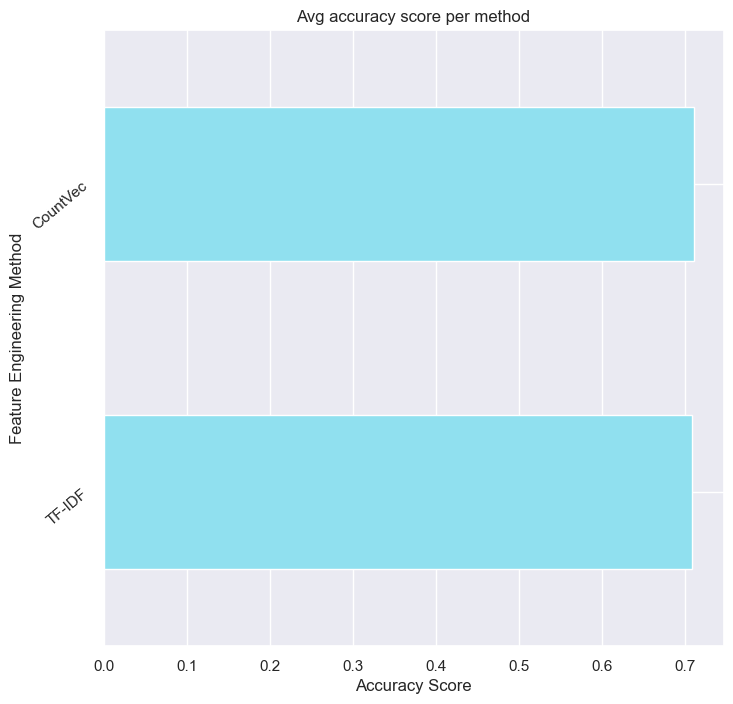

{'TF-IDF': [0.7085], 'CountVec': [0.7106]}

In [124]:
accuracy_dict = {"TF-IDF":[tfidf_avg_accuracy], "CountVec":[CountVec]}
accuracy_df = pd.DataFrame(accuracy_dict)

colors = ["#90e0ef"]  # Specify colors for each bar
accuracy_df.T.plot(kind='barh', figsize = (8,8), legend = False, color = colors)
plt.xlabel("Accuracy Score")
plt.ylabel('Feature Engineering Method')
plt.yticks(rotation = 40)
plt.title('Avg accuracy score per method')
plt.show()

accuracy_dict

Based on the average accuracy scores, `CountVec` is more accurate and will be used from this point.

### Model performance

The Classification Report gives us more information on where our model is going wrong - in our case, we will look at F1 score as that is the main indicator in our submission. The following metrics are calculated as part of the classification report. Furthermore, F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution

#### Precision

Precision describes how often the positive prediction is correctly made.

$$ \text{Precision} = \frac{TP}{TP \space + FP} = \frac{TP}{\text{Total Predicted Positive}} $$

#### Recall

Recall finds all the positive samples and deduces how often the predicted outcome comes out positive.

$$ \text{Recall} = \frac{TP}{TP \space + FN} = \frac{TP}{\text{Total \space Actual \space Positive}}$$

#### F1 Score

Weighted average of precision and recall. 

$$F1 = 2 \times \frac {\text{Precision} \space \times \space \text{Recall}}{\text{Precision} \space + \space \text{Recall}}$$

Making predictions for the validation sets will help us evaluate our models

In [125]:
tree_prediction = tree_count.predict(X_val) 
rfc_prediction = rfc_count.predict(X_val) 
Lsvc_prediction = Lsvc_count.predict(X_val) 
logreg_prediction = logreg_count.predict(X_val) 
SGD_prediction = SGD_count.predict(X_val) 
SVC_prediction = svc_count.predict(X_val) 
ridge_prediction = ridge_count.predict(X_val) 

#### Decision tree classifier

Confusion matrix: 
[[ 100   50  109   19]
 [  22  195  179   29]
 [  53  181 1316  205]
 [  10   45  200  451]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.54      0.36      0.43       278
           0       0.41      0.46      0.44       425
           1       0.73      0.75      0.74      1755
           2       0.64      0.64      0.64       706

    accuracy                           0.65      3164
   macro avg       0.58      0.55      0.56      3164
weighted avg       0.65      0.65      0.65      3164



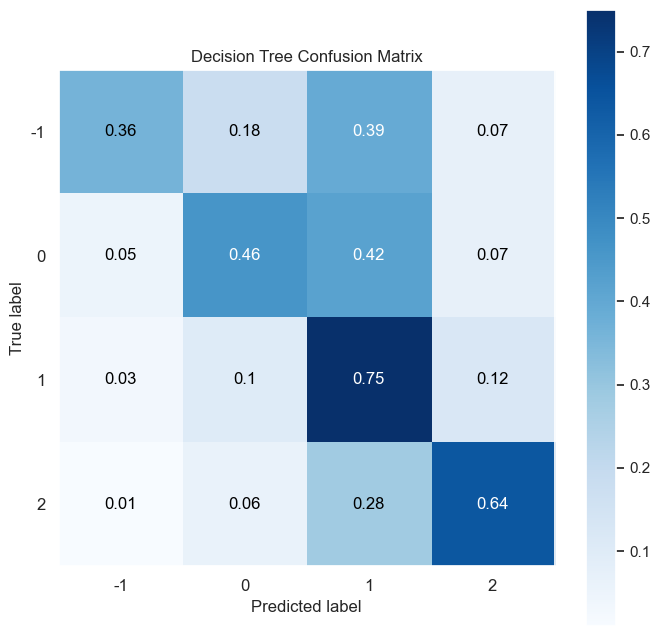

Overall accuracy: 0.6517
Weighted F1 score: 0.6494


{'web': 'https://www.comet.com/api/asset/download?assetId=6a4c3b613ea542ffbcd1fdc9e136d756&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=6a4c3b613ea542ffbcd1fdc9e136d756&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': '6a4c3b613ea542ffbcd1fdc9e136d756'}

In [126]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, tree_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, tree_prediction)}")
plot_confusion_matrix(y_val, tree_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# Print the overall accuracy
decison_tree_acc = round(accuracy_score(y_val, tree_prediction), 4)
print(f"Overall accuracy: {decison_tree_acc}")
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {decision_tree_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, tree_prediction), file_name = "decison_tree")

#### Random forest classifier

Confusion matrix: 
[[  81   49  137   11]
 [   7  185  218   15]
 [  14  113 1512  116]
 [   6   32  232  436]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.75      0.29      0.42       278
           0       0.49      0.44      0.46       425
           1       0.72      0.86      0.78      1755
           2       0.75      0.62      0.68       706

    accuracy                           0.70      3164
   macro avg       0.68      0.55      0.59      3164
weighted avg       0.70      0.70      0.69      3164



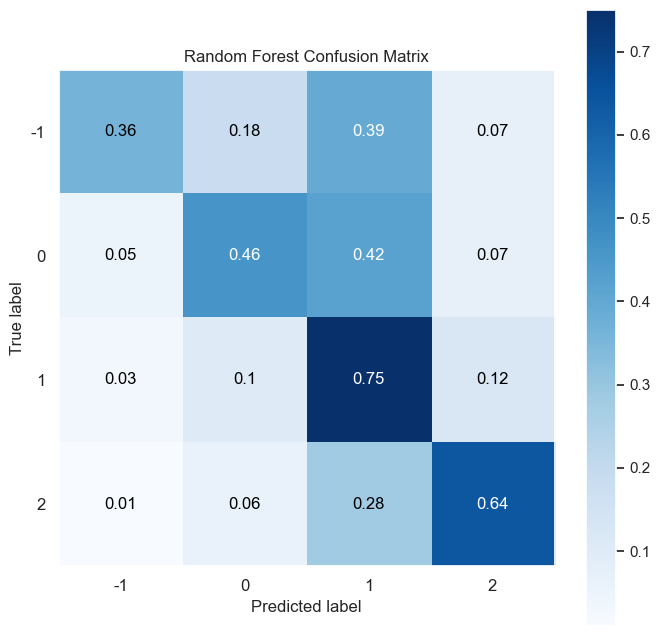

Overall accuracy: 0.6997
Weighted F1 score: 0.6855


{'web': 'https://www.comet.com/api/asset/download?assetId=b3302d70ba694121aa697a06531e5c6b&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=b3302d70ba694121aa697a06531e5c6b&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': 'b3302d70ba694121aa697a06531e5c6b'}

In [127]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, rfc_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, rfc_prediction)}")
plot_confusion_matrix(y_val, tree_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f"Overall accuracy: {random_forest_acc}")
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {random_forest_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, rfc_prediction), file_name = "random_forest")

#### LinearSVC

Confusion matrix: 
[[ 122   51   95   10]
 [  19  218  165   23]
 [  41  119 1437  158]
 [   9   40  138  519]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.64      0.44      0.52       278
           0       0.51      0.51      0.51       425
           1       0.78      0.82      0.80      1755
           2       0.73      0.74      0.73       706

    accuracy                           0.73      3164
   macro avg       0.67      0.63      0.64      3164
weighted avg       0.72      0.73      0.72      3164



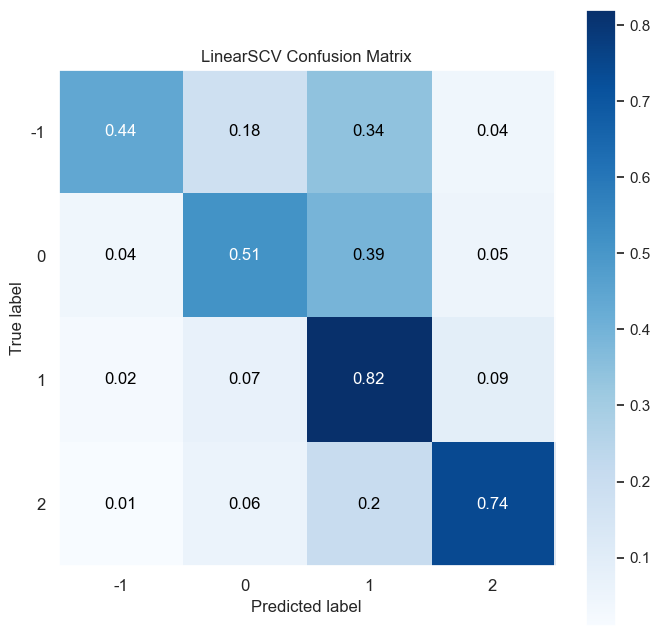

Overall accuracy: 0.7257
Weighted F1 score: 0.722


{'web': 'https://www.comet.com/api/asset/download?assetId=75c94c14eaaf4cfb8e3696a9f85fee54&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=75c94c14eaaf4cfb8e3696a9f85fee54&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': '75c94c14eaaf4cfb8e3696a9f85fee54'}

In [128]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, Lsvc_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, Lsvc_prediction)}")
plot_confusion_matrix(y_val, Lsvc_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("LinearSCV Confusion Matrix")
plt.show()

linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction), 4)
print(f"Overall accuracy: {linearSVC_acc}")
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {linearSVC_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, Lsvc_prediction), file_name = "linear_svc")

#### Logistic regression

Confusion matrix: 
[[ 113   46  110    9]
 [  17  189  197   22]
 [  24   81 1507  143]
 [   8   20  171  507]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.70      0.41      0.51       278
           0       0.56      0.44      0.50       425
           1       0.76      0.86      0.81      1755
           2       0.74      0.72      0.73       706

    accuracy                           0.73      3164
   macro avg       0.69      0.61      0.64      3164
weighted avg       0.72      0.73      0.72      3164



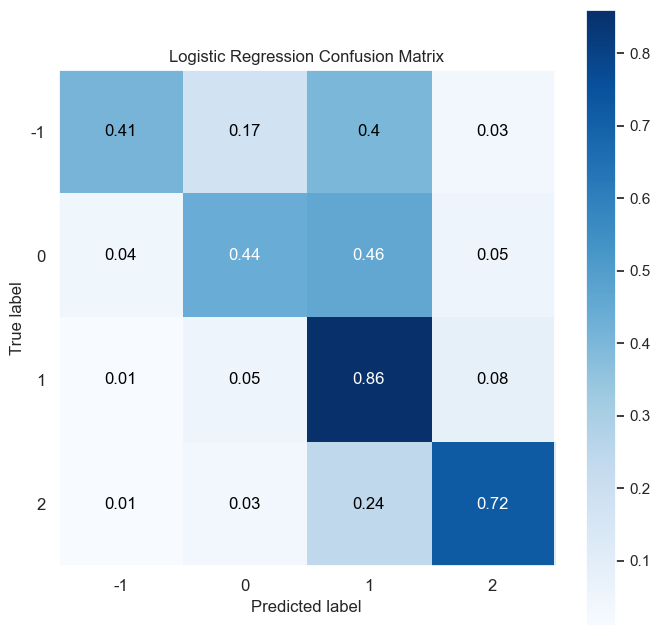

Overall accuracy: 0.732
Weighted F1 score: 0.722


{'web': 'https://www.comet.com/api/asset/download?assetId=5caf9c49e09c40c0b3612f86d989abd6&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=5caf9c49e09c40c0b3612f86d989abd6&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': '5caf9c49e09c40c0b3612f86d989abd6'}

In [129]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, logreg_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, logreg_prediction)}")
plot_confusion_matrix(y_val, logreg_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction), 4)
print(f"Overall accuracy: {logistic_reg_acc}")
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {logistic_reg_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, logreg_prediction), file_name = "logistic_reg")

#### SGD Classifier

Confusion matrix: 
[[ 126   42  103    7]
 [  24  200  175   26]
 [  28  105 1474  148]
 [   9   30  155  512]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.67      0.45      0.54       278
           0       0.53      0.47      0.50       425
           1       0.77      0.84      0.81      1755
           2       0.74      0.73      0.73       706

    accuracy                           0.73      3164
   macro avg       0.68      0.62      0.64      3164
weighted avg       0.72      0.73      0.72      3164



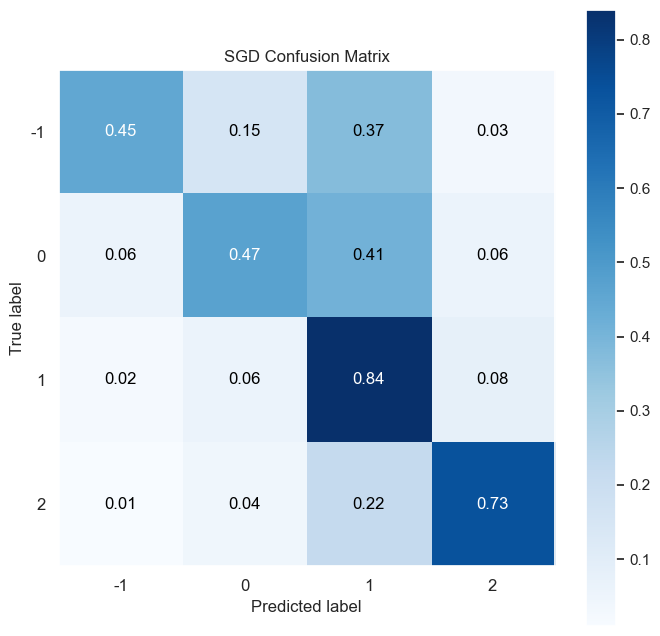

Overall accuracy: 0.7307
Weighted F1 score: 0.7245


{'web': 'https://www.comet.com/api/asset/download?assetId=a2f6af077ca34050b538e08c60576112&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=a2f6af077ca34050b538e08c60576112&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': 'a2f6af077ca34050b538e08c60576112'}

In [130]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, SGD_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, SGD_prediction)}")
plot_confusion_matrix(y_val, SGD_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("SGD Confusion Matrix")
plt.show()

sgd_acc = round(accuracy_score(y_val, SGD_prediction), 4)
print(f"Overall accuracy: {sgd_acc}")
sgd_f1 = round(f1_score(y_val, SGD_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {sgd_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, SGD_prediction), file_name = "sgd")

#### Support Vector Classifier

Confusion matrix: 
[[  73   47  146   12]
 [   7  160  228   30]
 [   3   68 1547  137]
 [   2   20  183  501]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.86      0.26      0.40       278
           0       0.54      0.38      0.44       425
           1       0.74      0.88      0.80      1755
           2       0.74      0.71      0.72       706

    accuracy                           0.72      3164
   macro avg       0.72      0.56      0.59      3164
weighted avg       0.72      0.72      0.70      3164



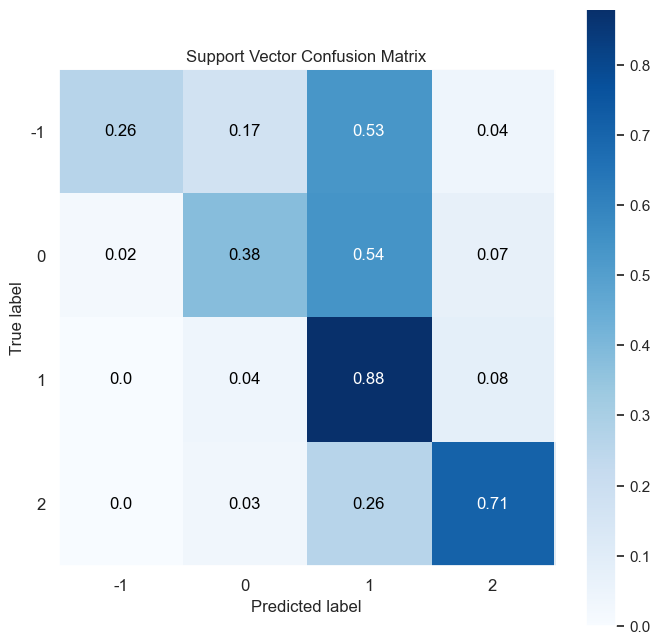

Overall accuracy: 0.7209
Weighted F1 score: 0.7011


{'web': 'https://www.comet.com/api/asset/download?assetId=0e5eefa0def04d279c27a6f9416d16f1&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=0e5eefa0def04d279c27a6f9416d16f1&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': '0e5eefa0def04d279c27a6f9416d16f1'}

In [131]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, SVC_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, SVC_prediction)}")
plot_confusion_matrix(y_val, SVC_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("Support Vector Confusion Matrix")
plt.show()

svc_acc = round(accuracy_score(y_val, SVC_prediction), 4)
print(f"Overall accuracy: {svc_acc}")
svc_f1 = round(f1_score(y_val, SVC_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {svc_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, SVC_prediction), file_name = "svc")

#### Ridge Classifier

Confusion matrix: 
[[ 113   51  104   10]
 [  18  201  179   27]
 [  29  113 1448  165]
 [   6   40  164  496]]


Classification report: 
              precision    recall  f1-score   support

          -1       0.68      0.41      0.51       278
           0       0.50      0.47      0.48       425
           1       0.76      0.83      0.79      1755
           2       0.71      0.70      0.71       706

    accuracy                           0.71      3164
   macro avg       0.66      0.60      0.62      3164
weighted avg       0.71      0.71      0.71      3164



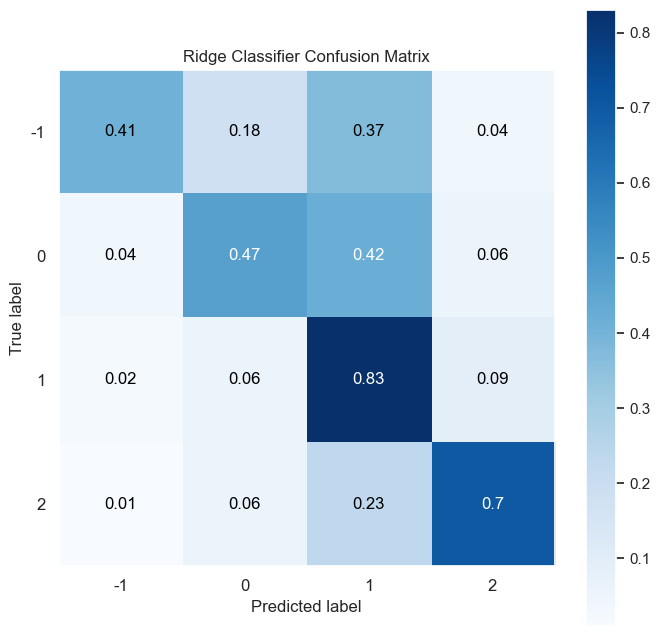

Overall accuracy: 0.7137
Weighted F1 score: 0.7075


{'web': 'https://www.comet.com/api/asset/download?assetId=c501e9c413054dbab83557d3dd6985d9&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=c501e9c413054dbab83557d3dd6985d9&experimentKey=0f673f271e594d9eb82582e3b6fd3cf1',
 'assetId': 'c501e9c413054dbab83557d3dd6985d9'}

In [132]:
print(f"Confusion matrix: \n{confusion_matrix(y_val, ridge_prediction)}")
print()
print()
print(f"Classification report: \n{classification_report(y_val, ridge_prediction)}")
plot_confusion_matrix(y_val, ridge_prediction, normalize = True, figsize = (8, 8), cmap = 'Blues')
plt.title("Ridge Classifier Confusion Matrix")
plt.show()

ridge_acc = round(accuracy_score(y_val, ridge_prediction), 4)
print(f"Overall accuracy: {ridge_acc}")
ridge_f1 = round(f1_score(y_val, ridge_prediction, average = "weighted"), 4)
print(f"Weighted F1 score: {ridge_f1}")

experiment.log_confusion_matrix(matrix = confusion_matrix(y_val, ridge_prediction), file_name = "ridge")

#### Model comparison

In [133]:
# Creating a dataframe with our models and their performance metrics
classifier_scores = {"Classifiers": ["Decision Tree", "Random Forest", "LinearSVC",
                                    "Logistic Regression", "Stochastic Gradient Descent",
                                    "Support Vector Classifier", "Ridge Classifier"],
                    "Accuracy": [decison_tree_acc, random_forest_acc, linearSVC_acc,
                                    logistic_reg_acc, sgd_acc, svc_acc, ridge_acc],
                    "Weighted F1 score": [decision_tree_f1, random_forest_f1, linearSVC_f1,
                                          logistic_reg_f1, sgd_f1, svc_f1, ridge_f1]}

df = pd.DataFrame(classifier_scores)
df.sort_values(by = ["Accuracy"], ascending = True, inplace = True)
df

,Classifiers,Accuracy,Weighted F1 score
0,Decision Tree,0.6517,0.6494
1,Random Forest,0.6997,0.6855
6,Ridge Classifier,0.7137,0.7075
5,Support Vector Classifier,0.7209,0.7011
2,LinearSVC,0.7257,0.7220
4,Stochastic Gradient Descent,0.7307,0.7245
3,Logistic Regression,0.7320,0.7220


In [134]:
# Log our accuracy and F1 scores
experiment.log_metrics({"decision_tree_accuracy": decison_tree_acc, "decision_tree_f1": decision_tree_f1})
experiment.log_metrics({"random_forest_accuracy": random_forest_acc, "random_forest_f1": random_forest_f1})
experiment.log_metrics({"linear_svc_accuracy": linearSVC_acc, "linear_svc_f1": linearSVC_f1})
experiment.log_metrics({"logistic_accuracy": logistic_reg_acc, "logistic_f1": logistic_reg_f1})
experiment.log_metrics({"sgd_accuracy": sgd_acc, "sgd_f1": sgd_f1})
experiment.log_metrics({"svc_accuracy": svc_acc, "svc_f1": svc_f1})
experiment.log_metrics({"ridge_accuracy": ridge_acc, "ridge_f1": ridge_f1})

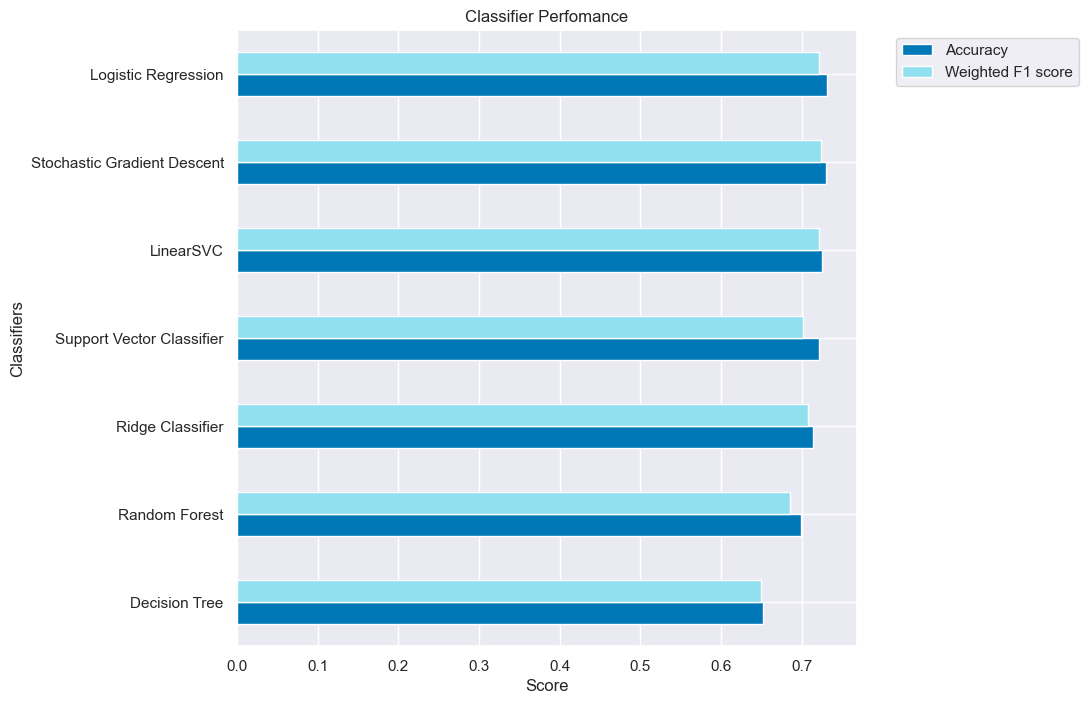

In [135]:
df.set_index(df["Classifiers"], inplace = True)
df.drop(["Classifiers"], axis = 1)
colors = ["#0077b6","#90e0ef"]  # Specify colors for each bar
df.plot(kind = 'barh', figsize = (8, 8), color = colors)
plt.xlabel("Score")
# plt.yticks(rotation = 45)
plt.title("Classifier Perfomance")
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.show()

The bar graph above compares all the 7 models based on their accuracy score and associated weighted F1 score. 

In machine learning, ensemble learning is the process of merging many models in order to improve overall model performance. Ensembles are made up of numerous heterogeneous or homogeneous models that have been trained on the same dataset. Each of these models is used to create predictions on the same input, which are then aggregated across all models in some way (for example, by taking the mean) to give the final result.

We are using a heterogeneous ensemble method and will look at the Voting classifier on our best performing models. A voting classifier is a classification approach that makes predictions using many classifiers. The voting classifier uses predictions from numerous classifiers to create predictions based on the most common one.

In [136]:
# Top 5 models
models = [("Logistic", logreg_count), ("LinearSVC", Lsvc_count), ("Stochastic Gradient Descent", SGD_count), ("SVC", svc_count), ("Ridge Classifier", ridge_count)]

# Specify weights for weighted model averaging
model_weightings = np.array([0.1, 0.3, 0.6, 0.75, 0.9])

# building the voting classifier
Voting_classifier = VotingClassifier(estimators = models, weights = model_weightings)

In [137]:
Voting_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('logistic',
                                               LogisticRegression())])),
                             ('LinearSVC',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('svc', LinearSVC())])),
                             ('Stochastic Gradient Descent',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('SGD', SGDClassifier())])),
                             ('SVC',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('SVC', SVC())])),
                             ('Ridge Classifier',
                              Pipeline(steps=[('CountVec',
                                               CountVectorizer(max_features=180000,
                                                               ngram_range=(1,
                                                                            2))),
                                              ('Ridge', RidgeClassifier())]))],
                 weights=array([0.1 , 0.3 , 0.6 , 0.75, 0.9 ]))

In [138]:
voting_prediction = Voting_classifier.predict(X_val) # Voting Classifier predictions

In [139]:
print(f"Classification report:\n{classification_report(y_val, voting_prediction)}")

# Checking the accuracy score
voting_acc = round(accuracy_score(y_val, voting_prediction), 4)
print(f"Overall accuracy for the Voting Classifier: {voting_acc}")
voting_f1 = round(f1_score(y_val, voting_prediction, average = "weighted"), 4)
print(f"Weighted F1 score for the Voting Classifier: {voting_f1}")

Classification report:
              precision    recall  f1-score   support

          -1       0.69      0.42      0.53       278
           0       0.53      0.45      0.49       425
           1       0.76      0.84      0.80      1755
           2       0.72      0.72      0.72       706

    accuracy                           0.72      3164
   macro avg       0.68      0.61      0.63      3164
weighted avg       0.72      0.72      0.72      3164

Overall accuracy for the Voting Classifier: 0.7235
Weighted F1 score for the Voting Classifier: 0.7155


Our ensemble method performs better than some models but it is not an improvement on our three best performing models. Therefore, we will not be using it any further.

In [140]:
experiment.log_metrics({"voting_accuracy": voting_acc, "voting_f1": voting_f1})

<a id="six"></a>
## 6. Experiments
<a href=#cont>Back to Table of Contents</a>

### Hyperparameter tuning

We will be doing hyperparameter tuning using [parfit](https://blog.mlreview.com/parfit-hyper-parameter-optimization-77253e7e175e), because it generally performs better and the run time is lower compared to gridsearch.

* We will perform hyperparameter tuning o the following models:
  * Logistic regression
  * LinearSVC
  * Stochastic Gradient Descent
    
The disadvantage of using pipelines to build our models is that we cannot easily obtain the parameters for our models. As a result, we will not be using pipelines to perform hyperparameter tuning and obtain the best parameters for our models. Instead, we'  will convert raw text data to numeric data separately from building the models.

In [141]:
# We have to to prepare our data again since we won't be using the pipelines

df_train = train.copy()
df_test = test.copy()

df_train['clean_tweets'] = tokenize_tweets(df_train)
df_test['clean_tweets'] = tokenize_tweets(df_test)

normalizer = WordNetLemmatizer()
df_train['clean_tweets'] = df_train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
df_test['clean_tweets'] = df_test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])



X = df_train['clean_tweets']
y = df_train['sentiment']
X_test = df_test['clean_tweets']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

In [142]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

In [143]:
import pickle
model_save_path = 'vect.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(vectorizer, file)

#### LinearSVC

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:    5.1s remaining:   46.9s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    5.8s remaining:   20.8s
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:    7.8s remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapsed:   16.6s remaining:   19.5s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:   43.9s remaining:   31.8s
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:   45.1s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:   45.3s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:   45.6s remaining:    2.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   45.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


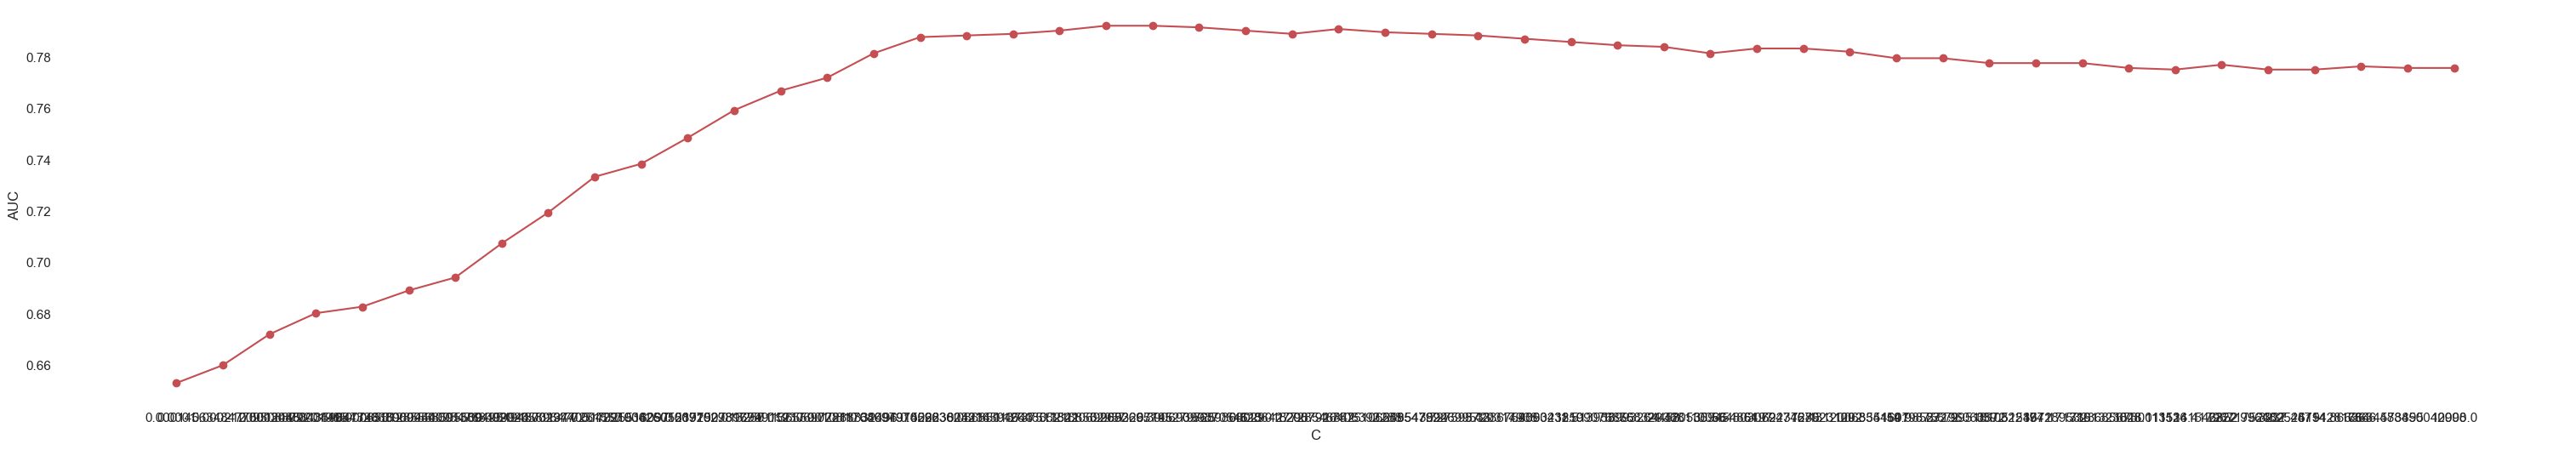

LinearSVC(C=0.18420699693267145) 
 0.7920353982300885


In [144]:
# Tuning LinearSVC using parfit
grid = {'C': np.logspace(-4, 4, 50)}
paramGrid = ParameterGrid(grid)
bestModel, bestScore, allModels, allScores = pf.bestFit(LinearSVC, paramGrid,
           X_train, y_train, X_val, y_val, 
          metric = accuracy_score,
           scoreLabel = "AUC")
print(bestModel, '\n',bestScore)

In [145]:
# We now retrain the LinearSVC with the best parameters we got from the tuning method that performed the best

final_lsvc = LinearSVC(C=0.18420699693267145, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge',
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None,
          tol=0.0001, verbose=0) 
final_lsvc.fit(X_train, y_train)
LinearSVC_prediction = final_lsvc.predict(X_val)
final_svc_acc = accuracy_score(y_val, LinearSVC_prediction)
print(f'\nOverall accuracy score for LinearSVC: {final_svc_acc}')



# Saving the model
# import pickle
# model_save_path = 'linear_svc.pkl'
# with open(model_save_path, 'wb') as file:
#     pickle.dump(final_lsvc, file)
    
  
# loading the saved LinearSVC model
# model_load_path = 'linear_svc.pkl'
# with open(model_load_path, 'rb') as file:
#     Logistic_reg_tuned=pickle.load(file)


Overall accuracy score for LinearSVC: 0.7920353982300885


In [146]:
model_save_path = 'final_lsvc.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(final_lsvc, file)

In [147]:
Final_lsvc_acc = accuracy_score(y_val, LinearSVC_prediction)
print(f"Overall accuracy score: {Final_lsvc_acc}")
Final_lsvc_f1 = f1_score(y_val, LinearSVC_prediction, average = 'weighted')
print(f"Weighted F1 score: {Final_lsvc_f1}")


Overall accuracy score: 0.7920353982300885
Weighted F1 score: 0.7856915325336646


In [148]:
experiment.log_metrics({"tuned_linear_svc_accuracy": Final_lsvc_acc, "tuned_linear_svc_f1": Final_lsvc_f1})

#### SGD

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:    0.4s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:    0.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapsed:    0.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:    0.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


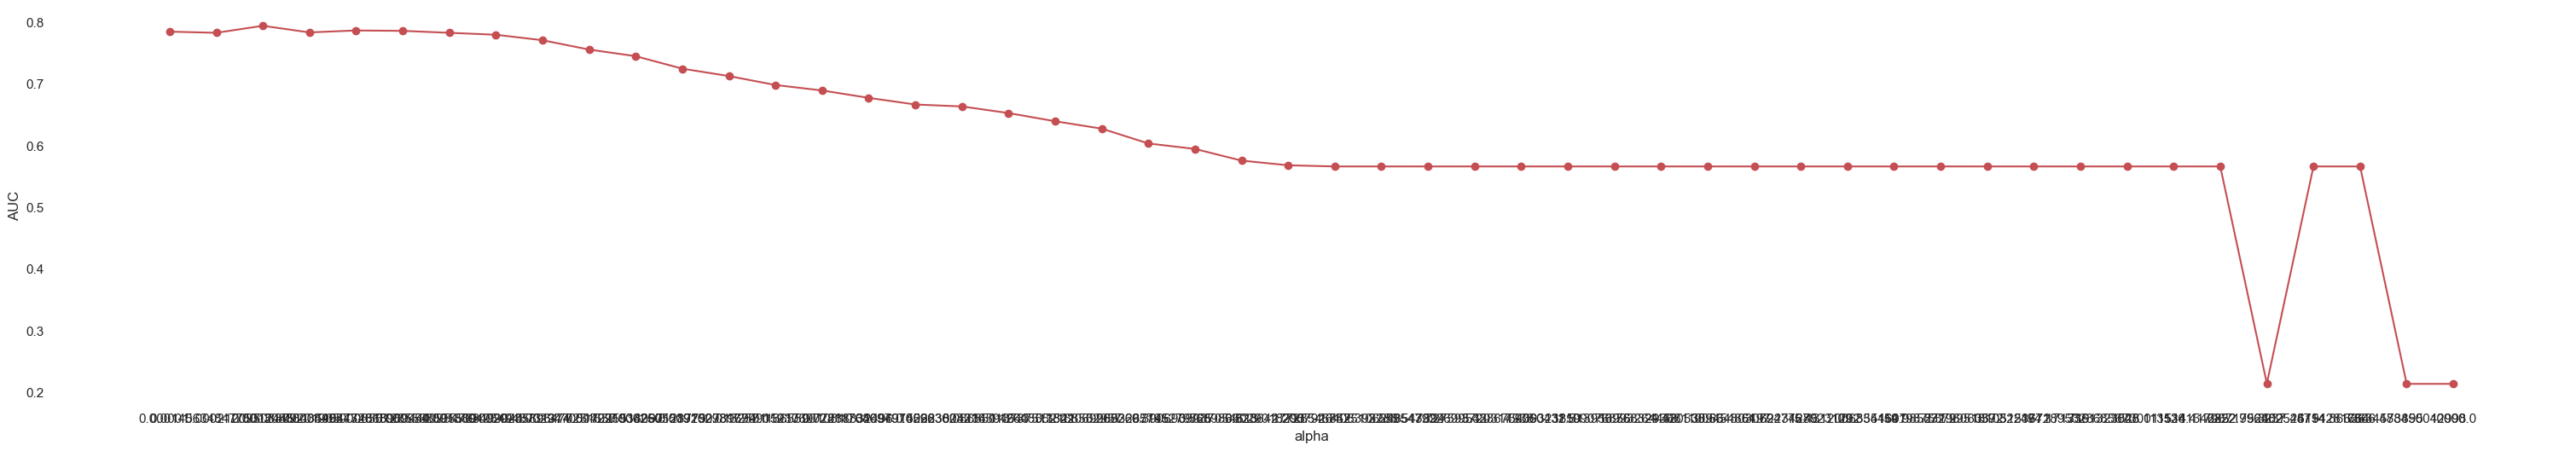

SGDClassifier(alpha=0.00021209508879201905) 

 0.7939317319848294


In [149]:
# Tuning SGD using parfit
grid = {
    'alpha':  np.logspace(-4, 4, 50), # learning rate
}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(SGDClassifier, paramGrid,
           X_train, y_train, X_val, y_val, 
           metric = accuracy_score,
           scoreLabel = "AUC")

print(bestModel,'\n\n' ,bestScore)

In [150]:
SGD_tuned = SGDClassifier(alpha=0.00021209508879201905, class_weight=None,
          fit_intercept=True,  loss='squared_hinge',
          max_iter=1000, penalty='l2', random_state=None,
          tol=0.0001, verbose=0) 
SGD_tuned.fit(X_train, y_train)
SGDClassifier_prediction = SGD_tuned.predict(X_val)
SGD_tuned_acc = accuracy_score(y_val, SGDClassifier_prediction)
print(f'\nOverall accuracy score for SDG: {SGD_tuned_acc}')


 #Saving the model
import pickle
model_save_path = 'final_SGD.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(SGD_tuned, file)


Overall accuracy score for SDG: 0.770543615676359


In [151]:
SGD_tuned_acc = accuracy_score(y_val, SGDClassifier_prediction)
print(f"Overall accuracy score: {SGD_tuned_acc}")
SGD_tuned_f1 = f1_score(y_val, SGDClassifier_prediction, average = "weighted")
print(f"Weighted F1 score: {SGD_tuned_f1}")

Overall accuracy score: 0.770543615676359
Weighted F1 score: 0.7697493603660878


In [152]:
experiment.log_metrics({"tuned_sgd_accuracy": SGD_tuned_acc, "tuned_sgd_f1": SGD_tuned_f1})

#### Logistic regression

-------------FITTING MODELS-------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.


[Parallel(n_jobs=-1)]: Done   5 out of  50 | elapsed:   24.7s remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  11 out of  50 | elapsed:   46.5s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  17 out of  50 | elapsed:  1.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  23 out of  50 | elapsed:  1.4min remaining:  1.7min
[Parallel(n_jobs=-1)]: Done  29 out of  50 | elapsed:  1.5min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  35 out of  50 | elapsed:  1.7min remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed:  1.8min remaining:   23.1s
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed:  1.8min remaining:    7.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  50 | elapsed:    0.1s remaining:    0.0s


-------------SCORING MODELS-------------


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


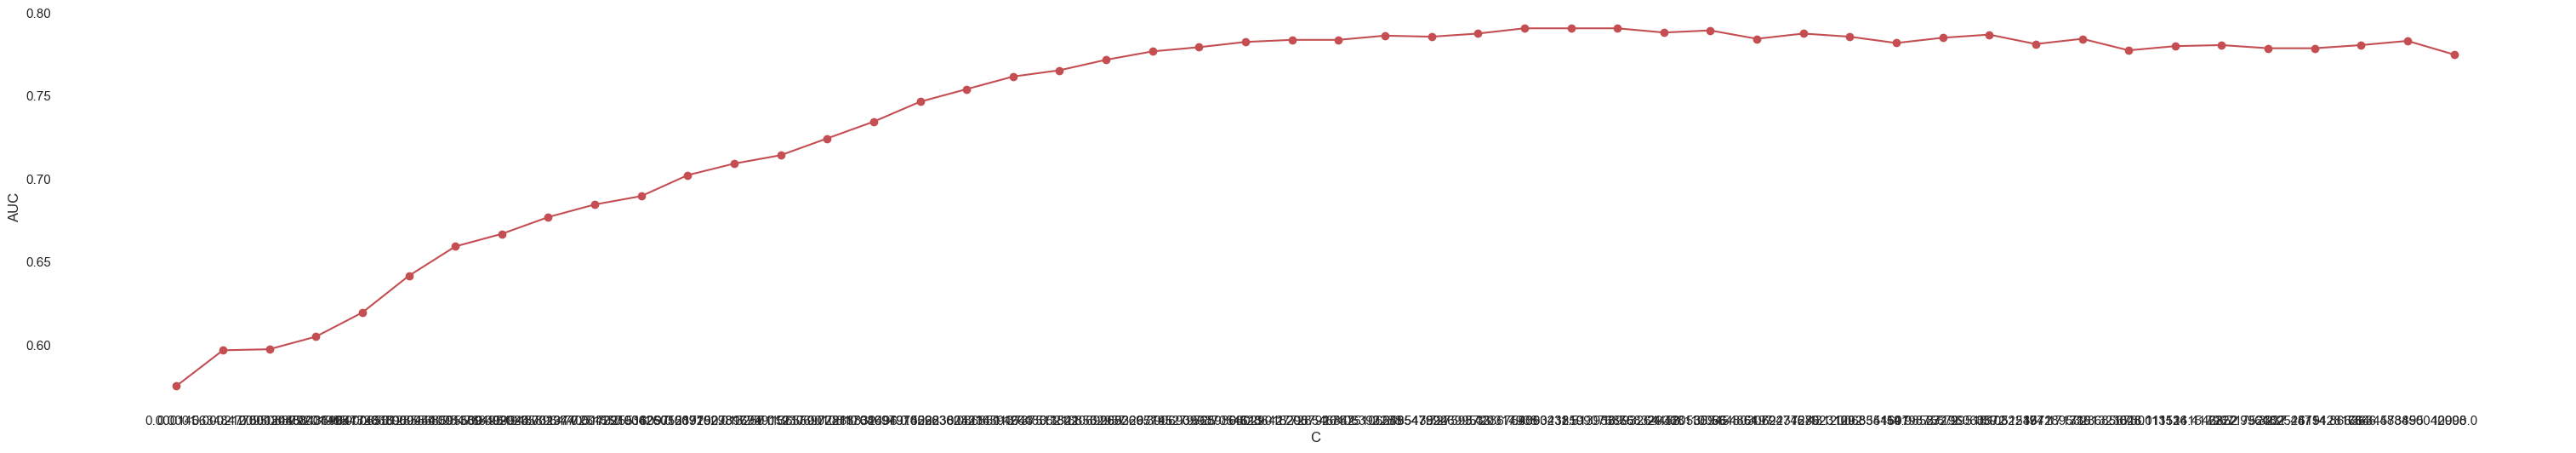

LogisticRegression(C=5.428675439323859) 

 0.7907711757269279


In [153]:
## Tuning logistic regression using parfit
grid = {'C': np.logspace(-4, 4, 50)}
paramGrid = ParameterGrid(grid)

bestModel, bestScore, allModels, allScores = pf.bestFit(LogisticRegression, paramGrid,
           X_train, y_train, X_val, y_val, 
           metric = accuracy_score,
           scoreLabel = "AUC")

print(bestModel,'\n\n' ,bestScore)

In [154]:
# retraining the best Ridge Classifer model we have
log_tuned = LogisticRegression(C=5.428675439323859)
log_tuned.fit(X_train, y_train)

LogisticRegression(C=5.428675439323859)

In [155]:
# Checking the accuracy score
log_prediction_tuned = log_tuned.predict(X_val)

log_acc = accuracy_score(y_val, log_prediction_tuned)
print(f"Overall accuracy score: {log_acc}")
log_f1 = f1_score(y_val, log_prediction_tuned, average = "weighted")
print(f"Weighted F1 score: {log_f1}")

Overall accuracy score: 0.7901390644753477
Weighted F1 score: 0.7836343375817341


In [156]:
experiment.log_metrics({"tuned_logistic_accuracy": log_acc, "tuned_logistic_f1": log_f1})

In [157]:
# Saving the model
import pickle
model_save_path = 'final_logistic.pkl'
with open(model_save_path, 'wb') as file:
    pickle.dump(log_tuned, file)

In [158]:
classifier_scores = {"Classifiers": ["Decision Tree", "Random Forest", "LinearSVC",
                                    "Logistic Regression", "Stochastic Gradient Descent",
                                    "Support Vector Classifier", "Ridge Classifier", "Tuned LinearSVC",
                                    "Tuned SGD", "Tuned Logistic Regression", "Voting Classifer"],
                    "Accuracy": [decison_tree_acc, random_forest_acc, linearSVC_acc,
                                    logistic_reg_acc, sgd_acc, svc_acc, ridge_acc, 
                                    Final_lsvc_acc, SGD_tuned_acc, log_acc, voting_acc],
                    "Weighted F1 score": [decision_tree_f1, random_forest_f1, linearSVC_f1,
                                          logistic_reg_f1, sgd_f1, svc_f1, ridge_f1, 
                                          Final_lsvc_f1, SGD_tuned_f1, log_f1, voting_f1]}

df = pd.DataFrame(classifier_scores)
df.sort_values(by = ["Accuracy"], ascending = True, inplace = True)
df

,Classifiers,Accuracy,Weighted F1 score
0,Decision Tree,0.651700,0.649400
1,Random Forest,0.699700,0.685500
6,Ridge Classifier,0.713700,0.707500
5,Support Vector Classifier,0.720900,0.701100
10,Voting Classifer,0.723500,0.715500
2,LinearSVC,0.725700,0.722000
4,Stochastic Gradient Descent,0.730700,0.724500
3,Logistic Regression,0.732000,0.722000
8,Tuned SGD,0.770544,0.769749
9,Tuned Logistic Regression,0.790139,0.783634


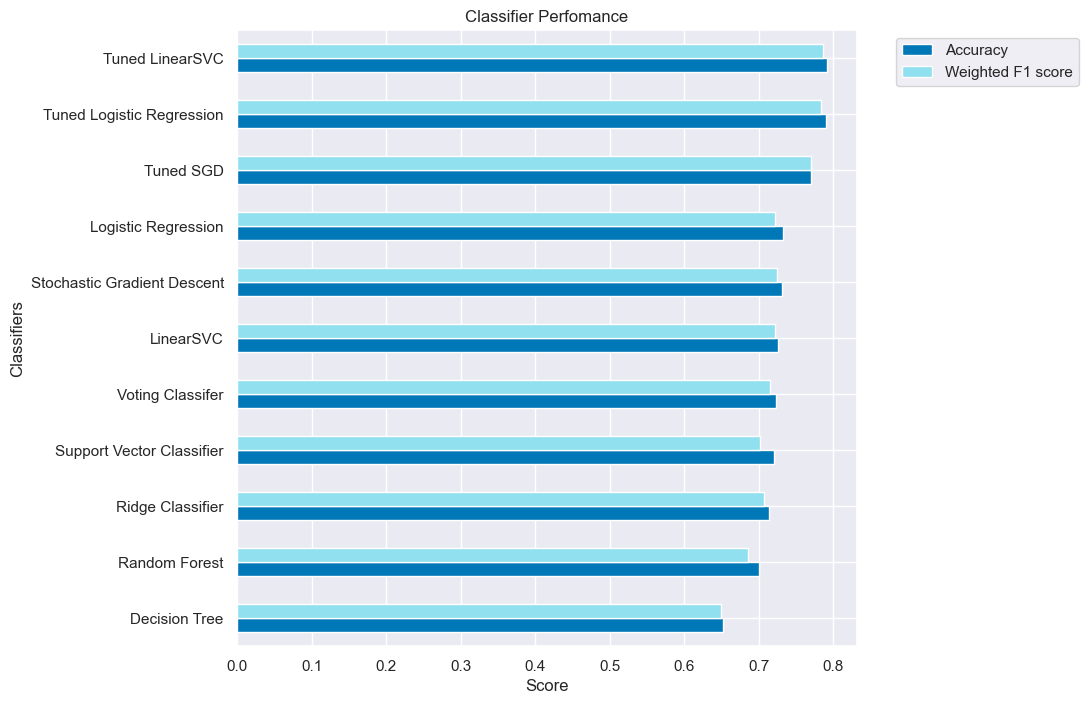

In [159]:
df.set_index(df["Classifiers"], inplace = True)
df.drop(["Classifiers"],axis = 1)
colors = ["#0077b6","#90e0ef"]  # Specify colors for each bar
df.plot(kind='barh', figsize = (8,8), color = colors)
plt.xlabel("Score")
plt.title("Classifier Perfomance")
plt.legend(bbox_to_anchor = (1.05, 1.0), loc = 'upper left')
plt.show()

This plot shows that the tuned Linear SVC model is the best performing out of all the models we considered. Therefore, we will be using this model to make our classifications.

#### Saving predictions

In [160]:
y_pred = final_lsvc.predict(X_test)

In [161]:
y_pred

array([2, 0, 1, ..., 0, 0, 1], dtype=int64)

In [162]:
test["sentiment"] = y_pred

In [324]:
test[["tweetid","sentiment"]]

,tweetid,sentiment
0,169760,2
1,35326,0
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,1
10542,875167,1
10543,78329,0
10544,867455,0


In [185]:
test[["tweetid","sentiment"]].to_csv("tuned_model.csv", index = False)

In [163]:
# close the experiment
experiment.end()
experiment.display()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/khulu2/classification-predict/0f673f271e594d9eb82582e3b6fd3cf1
COMET INFO:   Metrics:
COMET INFO:     decision_tree_accuracy    : 0.6517
COMET INFO:     decision_tree_f1          : 0.6494
COMET INFO:     linear_svc_accuracy       : 0.7257
COMET INFO:     linear_svc_f1             : 0.722
COMET INFO:     logistic_accuracy         : 0.732
COMET INFO:     logistic_f1               : 0.722
COMET INFO:     random_forest_accuracy    : 0.6997
COMET INFO:     random_forest_f1          : 0.6855
COMET INFO:     ridge_accuracy            : 0.7137
COMET INFO:     ridge_f1                  : 0.7075
COMET INFO:     sgd_accuracy              :

### Conclusion

We have successfully built several machine learning models to classify whether or not a person believes in man-made climate change based on EDSA's novel tweet data. While our models struggled to classify the anti-man-made climate change sentiment class, they performed exceptionally well when classifying the pro-man-made climate change sentiment class, followed by the news. Based on the validation dataset, our best model is the LinearSVC Classification model, which has an accuracy score of 0.79 and a weighted F1 score of 0.78.

Our best models are linear classifiers. Text classification problems are typically high dimensionality, and high dimensionality problems are likely to be linearly separable. Thus, linear classifiers perform well because they help to avoid over-fitting by separating the patterns of each class by large margins.